In [1]:
import numpy as np
import numpy.linalg as LA
from matplotlib import pyplot as plt

In [2]:
def PJcurvature(x,y):
    """
    input  : the coordinate of the three point
    output : the curvature and norm direction
    """
    t_a = LA.norm([x[1]-x[0],y[1]-y[0]])
    t_b = LA.norm([x[2]-x[1],y[2]-y[1]])
    
    M = np.array([
        [1, -t_a, t_a**2],
        [1, 0,    0     ],
        [1,  t_b, t_b**2]
    ])

    a = np.matmul(LA.inv(M),x)
    b = np.matmul(LA.inv(M),y)

    kappa = 2*(a[2]*b[1]-b[2]*a[1])/(a[1]**2.+b[1]**2.)**(1.5)
    return kappa, [b[1],-a[1]]/np.sqrt(a[1]**2.+b[1]**2.)
    


theta = [1.3, 1.3001,1.3002]

x = 5 * np.cos(theta)
y = 5 * np.sin(theta)

kappa,norm = PJcurvature(x,y)

kappa

-0.20000000381739208

In [3]:
np.sin(3.14169)

-9.73464100531075e-05

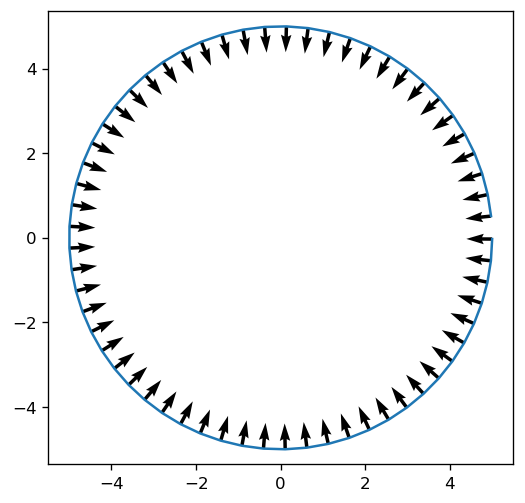

In [7]:
theta_arr = np.linspace(0,np.pi*2+0.2,64)

ka = []
no = []
po = []
for idx,theta in enumerate(theta_arr[1:-2]):
    x = 5 * np.cos(theta_arr[idx:idx+3])
    y = 5 * np.sin(theta_arr[idx:idx+3])
    kappa,norm = PJcurvature(x,y)
    ka.append(kappa)
    no.append(norm)
    po.append([x[1],y[1]])

po = np.array(po)
no = np.array(no)
ka = np.array(ka)

plt.figure(figsize=(5,5),dpi=120)
plt.plot(po[:,0],po[:,1])
plt.quiver(po[:,0],po[:,1],ka*no[:,0],ka*no[:,1])
plt.axis('equal')
plt.show()

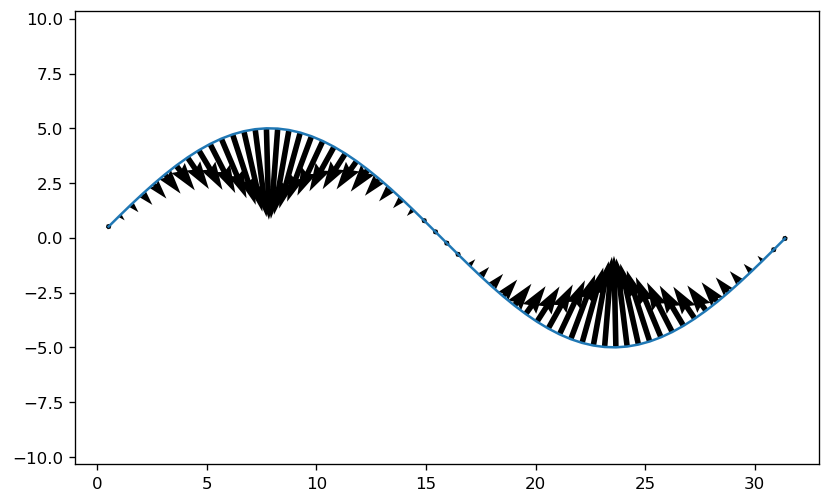

In [8]:
theta_arr = np.linspace(0,np.pi*2+0.2,64)

ka = []
no = []
po = []
for idx,theta in enumerate(theta_arr[1:-2]):
    x = 5 * (theta_arr[idx:idx+3])
    y = 5 * np.sin(theta_arr[idx:idx+3])
    kappa,norm = PJcurvature(x,y)
    ka.append(kappa)
    no.append(norm)
    po.append([x[1],y[1]])

po = np.array(po)
no = np.array(no)
ka = np.array(ka)
    
plt.figure(figsize=(8,5),dpi=120)
plt.plot(po[:,0],po[:,1])
plt.quiver(po[:,0],po[:,1],ka*no[:,0],ka*no[:,1])
plt.axis('equal')
plt.show()